In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
filepath = '/Users/halmamol/NEXT/files/NEXT100/'
event = '0nubb'

## Fullsim Files

In [4]:
#FULLSIM files
track_list = []

#loop over all the files, to read 'Tracks' information
for nfile in range(1,1000):
    
    filename_FS = filepath+f'esmeraldaFS/{event}/next100.{event}.{nfile}.cdst.h5'
    try:
        readfile = pd.read_hdf(filename_FS, 'Tracking/Tracks')
    except:
        print('File {} not good'.format(filename_0nubb))
        continue
        
    track_list.append(readfile)


track_list_FS = pd.concat([dt for dt in track_list]) 
track_list_FS.columns  

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z'],
      dtype='object')

In [5]:
track_list_FS

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,2.465933,174.496965,151,618,1,-287.62,-380.92,310.205250,...,315.757315,-209.87,-380.92,334.031875,0.103025,0.050779,0.0,13.995000,14.513333,12.486542
1,1,0,0.980549,78.145657,49,227,1,412.13,-194.32,85.224500,...,118.354448,443.23,-194.32,100.015665,0.146123,0.101071,0.0,13.328571,13.822222,12.398677
2,2,0,2.446440,113.447560,131,603,1,85.58,-178.77,784.210875,...,805.526273,85.58,-132.12,823.204369,0.114966,0.107648,0.0,13.995000,13.606250,13.884688
3,3,0,1.798077,92.573632,85,418,1,194.43,163.33,924.246000,...,931.932817,194.43,194.43,950.019375,0.113059,0.071414,0.0,13.822222,13.606250,13.202500
4,4,0,2.488484,113.310144,132,612,1,-474.22,-85.47,641.252813,...,715.705006,-396.47,-69.92,647.982152,0.121957,0.090466,0.0,13.822222,13.606250,13.927208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,9985,0,1.916027,108.240076,78,326,1,241.08,-132.12,216.199781,...,223.678189,334.38,-116.57,220.948175,0.126997,0.080382,0.0,14.136364,14.136364,9.814906
6,9986,0,2.463974,116.221842,123,546,1,209.98,-7.72,1044.154750,...,1067.560605,318.83,70.03,1061.435551,0.091164,0.085987,0.0,14.136364,13.995000,12.531250
7,9987,0,2.452690,128.222422,132,587,1,-101.02,85.58,331.091500,...,352.601056,23.38,147.78,338.838898,0.131551,0.069666,0.0,14.136364,13.995000,12.534854
8,9988,0,2.073608,90.722778,81,459,1,-101.02,-272.07,800.147063,...,822.138864,-101.02,-256.52,830.196833,0.126075,0.092257,0.0,13.822222,13.822222,13.895521


## DETSIM files

In [6]:
#FULLSIM files
track_list = []

#loop over all the files, to read 'Tracks' information
for nfile in range(1,1000):
    
    filename_DS = filepath+f'esmeraldaDS_202012/{event}/esmeralda.{nfile}.MC.h5'
    try:
        readfile = pd.read_hdf(filename_DS, 'Tracking/Tracks')
    except:
        print('File {} not good'.format(filename_0nubb))
        continue
        
    track_list.append(readfile)


track_list_DS = pd.concat([dt for dt in track_list]) 
track_list_DS.columns  

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z'],
      dtype='object')

In [7]:
track_list_DS

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,2.484321,180.146304,143,590,1,-287.62,-380.92,309.344469,...,315.189795,-209.87,-380.92,333.064188,0.066860,0.049726,0.0,13.995000,14.513333,12.488260
1,1,0,0.863553,77.640793,47,212,1,412.13,-194.32,85.221344,...,118.534692,458.78,-194.32,100.871826,0.129285,0.082254,0.0,12.958333,13.822222,11.858979
2,2,0,2.469303,113.444508,125,572,1,85.58,-163.22,783.298437,...,805.924092,85.58,-132.12,822.508956,0.100084,0.095370,0.0,13.995000,13.606250,13.879422
3,3,0,1.817325,97.876663,91,440,1,194.43,163.33,924.234750,...,931.163904,194.43,194.43,954.095569,0.111747,0.070215,0.0,13.822222,13.606250,13.211167
4,4,0,2.500730,104.462925,115,544,1,-474.22,-85.47,641.237375,...,716.811367,-396.47,-69.92,647.760761,0.130518,0.088781,0.0,13.822222,13.822222,13.609458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,9985,1,0.321398,49.708832,9,44,2,-101.02,-443.12,1268.160375,...,1272.174716,-85.47,-396.47,1271.987643,0.103981,0.062803,0.0,14.607576,14.546774,14.923695
7,9986,0,2.476557,109.558838,112,486,1,209.98,-7.72,1043.173625,...,1060.075188,209.98,23.38,1066.683330,0.101160,0.090699,0.0,13.995000,13.995000,12.539208
8,9987,0,2.473763,128.217525,135,601,1,-101.02,85.58,331.109062,...,352.201190,23.38,147.78,338.324191,0.135350,0.068736,0.0,14.136364,13.995000,12.525667
9,9988,0,2.092880,88.708339,73,426,1,-101.02,-287.62,799.185000,...,827.529470,-69.92,-287.62,824.981813,0.088810,0.072349,0.0,13.822222,13.822222,13.892354


## DETSIM files - edit E

In [8]:
#FULLSIM files
track_list = []

#loop over all the files, to read 'Tracks' information
for nfile in range(1,1000):
    
    filename_DS_var = filepath+f'esmeraldaDS_var/{event}/esmeralda.{nfile}.MC.h5'
    try:
        readfile = pd.read_hdf(filename_DS_var, 'Tracking/Tracks')
    except:
        print('File {} not good'.format(filename_0nubb))
        continue
        
    track_list.append(readfile)


track_list_DS_var = pd.concat([dt for dt in track_list]) 
track_list_DS_var.columns  

Index(['event', 'trackID', 'energy', 'length', 'numb_of_voxels',
       'numb_of_hits', 'numb_of_tracks', 'x_min', 'y_min', 'z_min', 'r_min',
       'x_max', 'y_max', 'z_max', 'r_max', 'x_ave', 'y_ave', 'z_ave', 'r_ave',
       'extreme1_x', 'extreme1_y', 'extreme1_z', 'extreme2_x', 'extreme2_y',
       'extreme2_z', 'blob1_x', 'blob1_y', 'blob1_z', 'blob2_x', 'blob2_y',
       'blob2_z', 'eblob1', 'eblob2', 'ovlp_blob_energy', 'vox_size_x',
       'vox_size_y', 'vox_size_z'],
      dtype='object')

In [9]:
track_list_DS_var

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,2.457956,171.284181,148,597,1,-287.62,-365.37,310.232219,...,334.065625,-240.97,-209.87,315.766417,0.107819,0.103730,0.0,13.995000,14.513333,12.493531
1,1,0,0.873446,73.471807,48,220,1,412.13,-194.32,85.226687,...,118.603165,458.78,-194.32,111.551914,0.118364,0.052628,0.0,13.328571,13.606250,12.386813
2,2,0,2.448754,113.999399,125,592,1,85.58,-163.22,783.282688,...,823.584092,194.43,-101.02,806.197450,0.101542,0.094893,0.0,13.995000,13.822222,14.360250
3,3,0,1.798750,92.577384,83,414,1,194.43,163.33,925.181375,...,931.642308,194.43,209.98,950.884968,0.119066,0.057106,0.0,13.822222,13.606250,13.209167
4,4,0,2.485092,121.738474,132,590,1,-474.22,-85.47,641.217188,...,648.218607,-443.12,-85.47,706.253987,0.090345,0.081837,0.0,13.606250,13.606250,13.932458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,9985,1,0.319267,49.708832,9,42,2,-101.02,-443.12,1268.171750,...,1272.218908,-69.92,-396.47,1272.509509,0.099720,0.061823,0.0,14.607576,14.546774,14.936574
7,9986,0,2.457830,113.195279,118,512,1,194.43,-7.72,1043.176250,...,1050.280255,194.43,38.93,1066.926912,0.160570,0.039564,0.0,13.995000,13.995000,12.536667
8,9987,0,2.452856,128.206398,134,591,1,-101.02,85.58,332.099375,...,354.116664,23.38,147.78,338.191660,0.141574,0.074184,0.0,14.136364,13.995000,12.504771
9,9988,0,2.067637,88.506571,73,428,1,-101.02,-287.62,800.133125,...,820.482163,-69.92,-287.62,825.984875,0.107797,0.071726,0.0,13.606250,13.822222,13.894792


In [10]:
#Check limits of the Energy ROI 

emin = 2.40
emax = 2.54

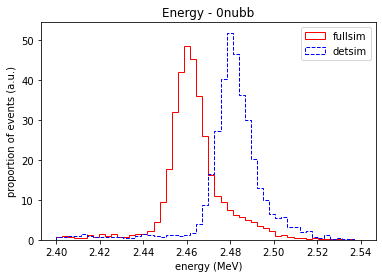

In [11]:
#Selecting events in the ROI
track_list_FS_ROI = track_list_FS[(track_list_FS.energy >= emin) & (track_list_FS.energy <= emax)]
track_list_DS_ROI = track_list_DS[(track_list_DS.energy >= emin) & (track_list_DS.energy <= emax)]

energy_FS = track_list_FS_ROI.energy
energy_DS = track_list_DS_ROI.energy

plt.hist(energy_FS, bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'fullsim')
plt.hist(energy_DS, bins = 50, range = (emin, emax), density=True, color='blue', histtype='step', label = 'detsim', linestyle='dashed')

plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Energy - {event}')
plt.legend(loc=1);
plt.show()

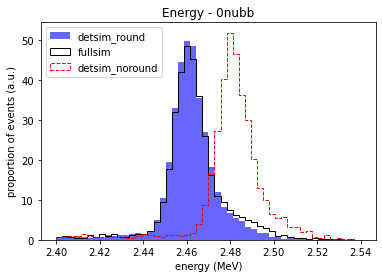

In [12]:
#Selecting events in the ROI
track_list_FS_ROI = track_list_FS[(track_list_FS.energy >= emin) & (track_list_FS.energy <= emax)]
track_list_DS_ROI = track_list_DS[(track_list_DS.energy >= emin) & (track_list_DS.energy <= emax)]
track_list_DS_var_ROI = track_list_DS_var[(track_list_DS_var.energy >= emin) & (track_list_DS_var.energy <= emax)]

energy_FS = track_list_FS_ROI.energy
energy_DS = track_list_DS_ROI.energy
energy_DS_var = track_list_DS_var_ROI.energy

fig = plt.figure()

plt.hist(energy_DS_var, bins = 50, range = (emin, emax), density=True, alpha=0.6, color='b', label = 'detsim_round')
plt.hist(energy_FS, bins = 50, range = (emin, emax), density=True, color='black', histtype='step', label = 'fullsim')
plt.hist(energy_DS, bins = 50, range = (emin, emax), density=True, color='red', histtype='step', label = 'detsim_noround', linestyle='dashed')


plt.xlabel('energy (MeV)')
plt.ylabel('proportion of events (a.u.)')
plt.title(f'Energy - {event}')
plt.legend(loc=2);
plt.show()

fig.savefig(f'Energy_{event}-FSvsDS.png')
fig.savefig(f'Energy_{event}-FSvsDS.pdf')